In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib import rc, rcParams
f = mticker.ScalarFormatter(useMathText=True)

import scipy
import pandas as pd
import yfinance as yf
from yahoofinancials import YahooFinancials
from datetime import datetime as dt
from datetime import date, timedelta
import datetime
from matplotlib.dates import YearLocator, DateFormatter

In [2]:
###############
# LaTeX block #
###############

rc('text', usetex=True)
rc('font',**{'family':'serif','serif':['Palatino']})
rc('xtick', labelsize=18)
rc('ytick', labelsize=18)
rcParams['legend.numpoints'] = 1

In [3]:
def plot_cosmetics_single():
    
    ax = plt.gca()
    ax.tick_params(direction='in', axis='both', which='major', length=6.5, width=1.2, labelsize=18)
    ax.tick_params(direction='in', axis='both', which='minor', length=3., width=1.2, labelsize=18)
    ax.xaxis.set_tick_params(pad=7)
    ax.xaxis.labelpad = 5
    ax.yaxis.labelpad = 15
    
    
def plot_cosmetics_multi():    
    
    ax = plt.gca()
    ax.tick_params(direction='in', axis='both', which='major', length=6.5, width=1.2, labelsize=20)
    ax.tick_params(direction='in', axis='both', which='minor', length=3., width=1.2, labelsize=20)
    ax.xaxis.set_tick_params(pad=10)
    ax.xaxis.labelpad = 5
    ax.yaxis.labelpad = 10

## Use Ticker to plot directly from Yahoo Finance.

<Axes: title={'center': "APPLE's stock price"}, xlabel='Date'>

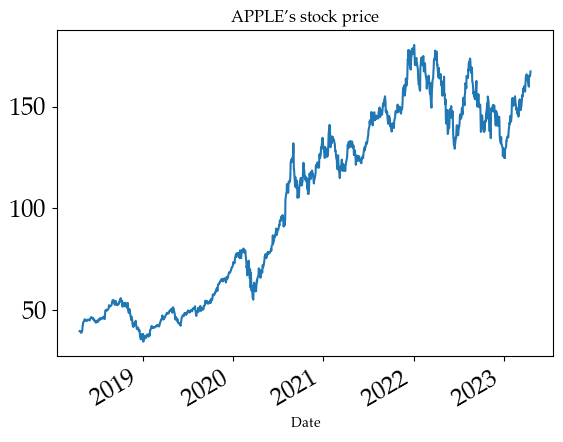

In [4]:
ticker = yf.Ticker('AAPL')
aapl_df_ticker = ticker.history(period="5y")
aapl_df_ticker['Close'].plot(title="APPLE's stock price")

## Get access to the data and also store them in arrays.
I want to obtain the same plot.

In [ ]:
# download the series, not necessary for the next step
aapl_df = yf.download('AAPL', 
                      start='2019-01-01', 
                      end='2021-06-12', 
                      progress=False,
)
print(f'{aapl_df.head()}')



# store it as a pandas dataframe, to have it accessible as numpy arrays
asset_aapl = pd.DataFrame( yf.download('AAPL', 
                      start='2019-01-01', 
                      #end='2021-06-12', 
                      progress=False)
)

In [ ]:
closing_price_aapl = asset_aapl.loc[:, 'Close']          # access the the dataframe
asset_aapl['Date'] = pd.to_datetime(asset_aapl.index)    # store the date 
date_aapl = pd.to_datetime(asset_aapl.index)             # convert it to use it for computation, not essential

print(f'Data spanning {(asset_aapl.Date.max() - asset_aapl.Date.min()).days} days, from {asset_aapl.Date.min()} to {asset_aapl.Date.max()}.')


f, ax = plt.subplots(figsize = [5.5, 4.])
plot_cosmetics_single()

ax.set_title('APPLE`s Stock Price', fontsize=15)
ax.plot(asset_aapl['Date'], closing_price_aapl)
ax.xaxis.set_major_locator(YearLocator(1))
ax.xaxis.set_major_formatter(DateFormatter("%Y"))
ax.xaxis.set_tick_params(rotation=45)
ax.set_xlabel('Date', fontsize=15)

## I want to make the plot interactive with the mouse.